<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/seeds_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
files.upload()

Saving Seed_Data.csv to Seed_Data.csv


{'Seed_Data.csv': b'A,P,C,LK,WK,A_Coef,LKG,target\r\n15.26,14.84,0.871,5.763,3.312,2.221,5.22,0\r\n14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0\r\n14.29,14.09,0.905,5.291,3.337,2.699,4.825,0\r\n13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0\r\n16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0\r\n14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0\r\n14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0\r\n14.11,14.1,0.8911,5.42,3.302,2.7,5,0\r\n16.63,15.46,0.8747,6.053,3.465,2.04,5.877,0\r\n16.44,15.25,0.888,5.884,3.505,1.969,5.533,0\r\n15.26,14.85,0.8696,5.714,3.242,4.543,5.314,0\r\n14.03,14.16,0.8796,5.438,3.201,1.717,5.001,0\r\n13.89,14.02,0.888,5.439,3.199,3.986,4.738,0\r\n13.78,14.06,0.8759,5.479,3.156,3.136,4.872,0\r\n13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0\r\n14.59,14.28,0.8993,5.351,3.333,4.185,4.781,0\r\n13.99,13.83,0.9183,5.119,3.383,5.234,4.781,0\r\n15.69,14.75,0.9058,5.527,3.514,1.599,5.046,0\r\n14.7,14.21,0.9153,5.205,3.466,1.767,4.649,0\r\n12.72,13.57,0.8686,5.226,3.049,4.102,4.914,0\r\n14

In [ ]:
seed_data = pd.read_csv('Seed_Data.csv')
seed_data

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
seed_data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
seed_data.shape

(210, 8)

In [ ]:
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
seed_data.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [ ]:
seed_data.describe

<bound method NDFrame.describe of          A      P       C     LK     WK  A_Coef    LKG  target
0    15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2    14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
..     ...    ...     ...    ...    ...     ...    ...     ...
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

[210 rows x 8 columns]>

In [ ]:
X = seed_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[5.763 3.312]
 [5.554 3.333]
 [5.291 3.337]
 [5.324 3.379]
 [5.658 3.562]
 [5.386 3.312]
 [5.563 3.259]
 [5.42  3.302]
 [6.053 3.465]
 [5.884 3.505]
 [5.714 3.242]
 [5.438 3.201]
 [5.439 3.199]
 [5.479 3.156]
 [5.482 3.114]
 [5.351 3.333]
 [5.119 3.383]
 [5.527 3.514]
 [5.205 3.466]
 [5.226 3.049]
 [5.658 3.129]
 [5.52  3.168]
 [5.618 3.507]
 [5.099 2.936]
 [5.789 3.245]
 [5.833 3.421]
 [5.395 3.026]
 [5.395 2.956]
 [5.541 3.221]
 [5.516 3.065]
 [5.454 2.975]
 [5.757 3.371]
 [5.717 3.186]
 [5.585 3.15 ]
 [5.712 3.328]
 [5.709 3.485]
 [5.826 3.464]
 [5.832 3.683]
 [5.656 3.288]
 [5.397 3.298]
 [5.348 3.156]
 [5.351 3.158]
 [5.138 3.201]
 [5.877 3.396]
 [5.579 3.462]
 [5.376 3.155]
 [5.701 3.393]
 [5.57  3.377]
 [5.545 3.291]
 [5.678 3.258]
 [5.585 3.272]
 [5.674 3.434]
 [5.715 3.113]
 [5.504 3.199]
 [5.741 3.113]
 [5.702 3.212]
 [5.388 3.377]
 [5.384 3.412]
 [5.662 3.419]
 [5.159 3.032]
 [5.008 2.85 ]
 [4.902 2.879]
 [5.076 3.042]
 [5.395 3.07 ]
 [5.262 3.026]
 [5.139 3.119]
 [5.63  3.

In [ ]:
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

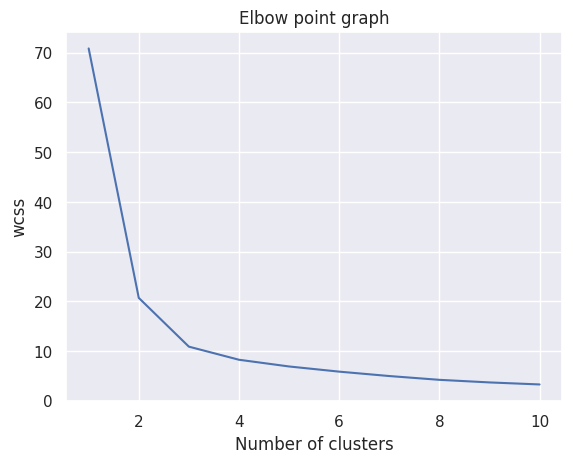

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

k = 3

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
Y = kmeans.fit_predict(X)
print(Y)

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 1 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


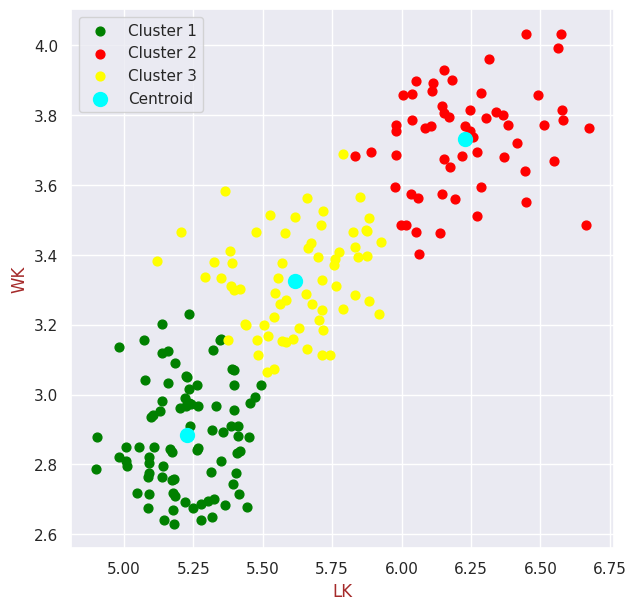

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=40, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=40, c='red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=40, c='yellow', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c ='cyan', label ='Centroid')
plt.xlabel('LK', c='brown')
plt.ylabel('WK', c='brown')
plt.legend()
plt.show()